In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

In [2]:
dataset = pd.read_csv('SeoulBikeData.csv')

In [3]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
dataset.drop('Date', axis=1, inplace=True)
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
dataset.columns = [i.split("(")[0].strip().title().replace(" ","_") for i in [*dataset.columns]]
dataset.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [7]:
print("The number of null values for each feature is:", dataset.isnull().sum())
print("The number of duplicate records in the dataset are :" ,dataset.duplicated().sum())

The number of null values for each feature is: Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_Speed               0
Visibility               0
Dew_Point_Temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64
The number of duplicate records in the dataset are : 0


In [8]:
# Performing label encoding on the columns 'Seasons', 'Holiday', 'Functioning_Day'

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset["Seasons_new"] = labelencoder.fit_transform(dataset["Seasons"])
dataset["Holiday_new"] = labelencoder.fit_transform(dataset["Holiday"])
dataset["Functioning_new"] = labelencoder.fit_transform(dataset["Functioning_Day"] )

print(dataset)  # The last three columns are as below after performing label encoding

      Rented_Bike_Count  Hour  Temperature  Humidity  Wind_Speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew_Point_Temperature  Solar_Radi

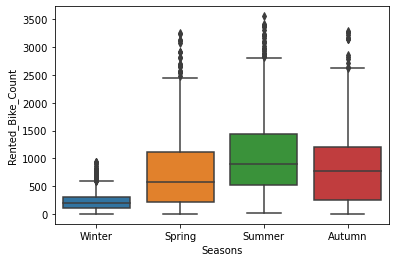

In [9]:
ax = sns.boxplot(x="Seasons", y="Rented_Bike_Count", data=dataset)

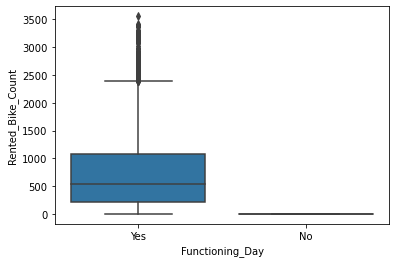

In [10]:
ax = sns.boxplot(x="Functioning_Day", y="Rented_Bike_Count", data=dataset)

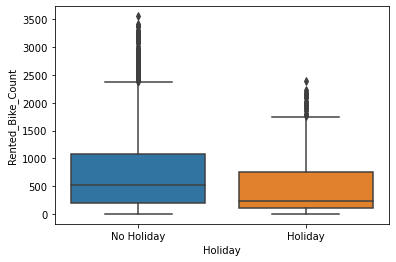

In [11]:
ax = sns.boxplot(x="Holiday", y="Rented_Bike_Count", data=dataset)

In [12]:
# creating instance of one-hot-encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data = enc.fit_transform(dataset[['Seasons_new','Holiday_new','Functioning_new']]).toarray()

In [13]:
dataset["Seasons"].unique()
dataset["Holiday"].unique()
dataset["Functioning_Day"].unique()


array(['Yes', 'No'], dtype=object)

In [14]:
enc_data = pd.DataFrame(enc_data)

In [15]:
enc_data.columns = ['Autumm', 'Spring', 'Summer', 'Winter','Holiday_no','Holiday_yes','Functioning_yes','Functioning_no']
enc_data.head()

,Autumm,Spring,Summer,Winter,Holiday_no,Holiday_yes,Functioning_yes,Functioning_no
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [16]:
# merge with main df bridge_df on key values
data = dataset.join(enc_data)
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,...,Holiday_new,Functioning_new,Autumm,Spring,Summer,Winter,Holiday_no,Holiday_yes,Functioning_yes,Functioning_no
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [17]:
data.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Seasons_new',
       'Holiday_new', 'Functioning_new', 'Autumm', 'Spring', 'Summer',
       'Winter', 'Holiday_no', 'Holiday_yes', 'Functioning_yes',
       'Functioning_no'],
      dtype='object')

In [18]:
data.drop(['Seasons','Holiday', 'Functioning_Day', 'Seasons_new',
       'Holiday_new', 'Functioning_new'], axis=1, inplace=True)
data.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Autumm', 'Spring', 'Summer', 'Winter', 'Holiday_no',
       'Holiday_yes', 'Functioning_yes', 'Functioning_no'],
      dtype='object')

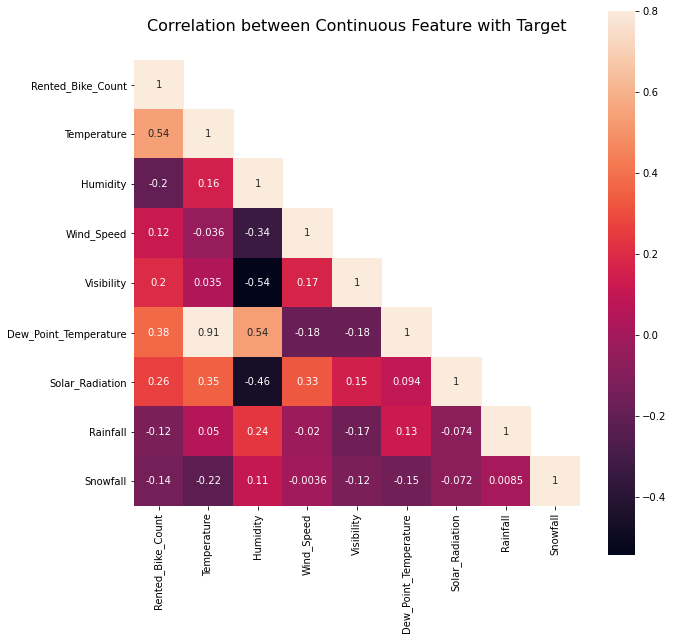

In [19]:
# Compute the correlation matrix
# list of continuous feature
columns = ['Rented_Bike_Count','Temperature', 'Humidity', 'Wind_Speed','Visibility', 'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall','Snowfall' ]
# calculate correlation matrix.
corrMatt = dataset[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between Continuous Feature with Target", fontsize=16, y=1.05)
plt.show()

In [20]:
data['Rented_class_y'] = 0

In [21]:
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Autumm,Spring,Summer,Winter,Holiday_no,Holiday_yes,Functioning_yes,Functioning_no,Rented_class_y
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


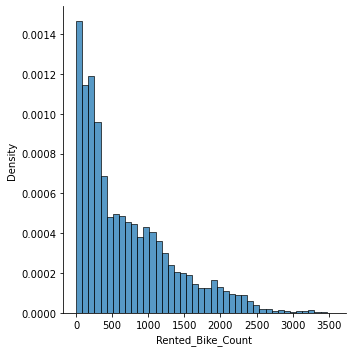

In [22]:
sns.displot(data, x="Rented_Bike_Count",stat="density")

#the data is right skewed
#For distributions that have outliers or are skewed, the median is often the preferred measure of central 
#tendency because the median is more resistant to outliers than the mean.

In [23]:
#data[['Rented_Bike_Count']].mean() #704.602055
data[['Rented_Bike_Count']].median() # 504.5

Rented_Bike_Count    504.5
dtype: float64

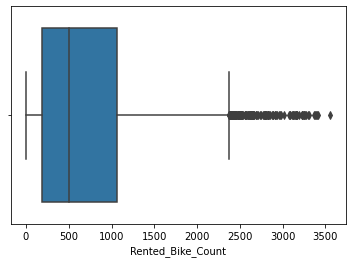

In [24]:
ax = sns.boxplot(x=data["Rented_Bike_Count"])
#right skewed

In [25]:
data.loc[data['Rented_Bike_Count'] > 505 , 'Rented_class_y' ] = 1

In [26]:
data.head(10)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point_Temperature,Solar_Radiation,Rainfall,Snowfall,Autumm,Spring,Summer,Winter,Holiday_no,Holiday_yes,Functioning_yes,Functioning_no,Rented_class_y
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [27]:
data.drop('Rented_Bike_Count', axis=1, inplace=True)

In [28]:
data.columns

Index(['Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility',
       'Dew_Point_Temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Autumm', 'Spring', 'Summer', 'Winter', 'Holiday_no', 'Holiday_yes',
       'Functioning_yes', 'Functioning_no', 'Rented_class_y'],
      dtype='object')

In [29]:
data.shape

(8760, 18)

In [30]:
X = data.drop(['Rented_class_y'], axis=1)
y = data['Rented_class_y']

In [31]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [32]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_test

array([[-1.22559711, -0.18026967,  0.73677583, ...,  0.22521028,
        -0.18266646,  0.18266646],
       [-1.37017612,  0.73774397,  0.98259761, ...,  0.22521028,
        -0.18266646,  0.18266646],
       [ 0.79850902, -0.77280574,  0.34346097, ...,  0.22521028,
        -0.18266646,  0.18266646],
       ...,
       [-0.35812306,  0.67932492,  1.91672038, ...,  0.22521028,
        -0.18266646,  0.18266646],
       [-0.21354405, -1.71585611, -0.73815487, ...,  0.22521028,
        -0.18266646,  0.18266646],
       [ 1.08766704, -0.43063702,  1.08092632, ...,  0.22521028,
        -0.18266646,  0.18266646]])

In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8755    1
8756    1
8757    1
8758    1
8759    1
Name: Rented_class_y, Length: 8760, dtype: int64

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6132, 17)
(2628, 17)
(6132,)
(2628,)


SUPPORT VECTOR CLASSIFIER

In [36]:
# "Support vector classifier"
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
#Predicting the test set result
from sklearn import metrics
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [38]:
#Creating the classification_report
c_report = classification_report(y_test_pred,y_test)
print(c_report)
print('Accuracy Score for linear kernel (test data)')
print(accuracy_score(y_test, y_test_pred)*100)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1412
           1       0.83      0.88      0.85      1216

    accuracy                           0.86      2628
   macro avg       0.86      0.86      0.86      2628
weighted avg       0.86      0.86      0.86      2628

Accuracy Score for linear kernel (test data)
85.95890410958904


In [39]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    classes = ['count less than 505','count more than 505']
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf, annot=True,yticklabels=classes,xticklabels=classes, fmt='g',cmap='Blues')
    plt.tight_layout()
    plt.show()

Train score 0.8718199608610567
Test score 0.8595890410958904
Train Confusion matrix


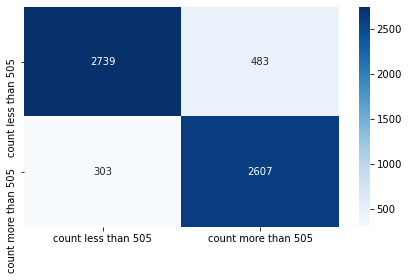

Test Confusion matrix


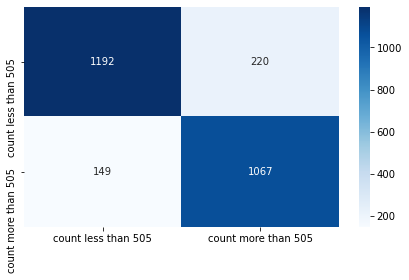

In [40]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [41]:
#type2
classifier_rbf = SVC(kernel='rbf',C=1, random_state=0)
classifier_rbf.fit(X_train, y_train)

SVC(C=1, random_state=0)

In [42]:
#Predicting the test set result
y_train_pred_rbf = classifier_rbf.predict(X_train)
y_pred_rbf = classifier_rbf.predict(X_test)

In [43]:
#Creating the classification_report
c_report_rbf = classification_report(y_pred_rbf,y_test)
print(c_report_rbf)
print('Accuracy Score for RBF kernel (test data)')
print(accuracy_score(y_test, y_pred_rbf)*100)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1416
           1       0.85      0.90      0.87      1212

    accuracy                           0.88      2628
   macro avg       0.88      0.88      0.88      2628
weighted avg       0.88      0.88      0.88      2628

Accuracy Score for RBF kernel (test data)
88.01369863013699


In [44]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    classes = ['count less than 505','count more than 505']
    cf_rbf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf_rbf, annot=True,yticklabels=classes,xticklabels=classes, fmt='g', cmap='Blues')
    plt.tight_layout()
    plt.show()

Train score 0.8884540117416829
Test score 0.8801369863013698
Train Confusion matrix


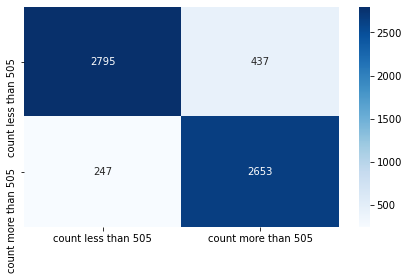

Test Confusion matrix


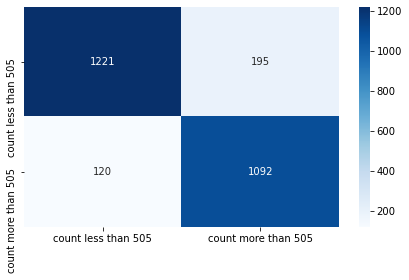

In [45]:
print(f'Train score {accuracy_score(y_train_pred_rbf,y_train)}')
print(f'Test score {accuracy_score(y_pred_rbf,y_test)}')
plot_confusionmatrix(y_train_pred_rbf,y_train,dom='Train')
plot_confusionmatrix(y_pred_rbf,y_test,dom='Test')

In [46]:
#type3
classifier_poly = SVC(kernel='poly',C=1, random_state=0)
classifier_poly.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=0)

In [47]:
#Predicting the test set result
y_train_pred_poly = classifier_poly.predict(X_train)
y_pred_poly = classifier_poly.predict(X_test)

In [48]:
#Creating the classification_report
c_report_poly = classification_report(y_pred_poly,y_test)
print(c_report_poly)
print('Accuracy Score for poly kernel (test data)')
print(accuracy_score(y_test, y_pred_poly)*100)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1324
           1       0.87      0.86      0.87      1304

    accuracy                           0.87      2628
   macro avg       0.87      0.87      0.87      2628
weighted avg       0.87      0.87      0.87      2628

Accuracy Score for poly kernel (test data)
86.87214611872146


In [49]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    classes = ['count less than 505','count more than 505']
    cf_poly = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf_poly, annot=True,yticklabels=classes,xticklabels=classes, fmt='g', cmap='Blues')
    plt.tight_layout()
    plt.show()

Train score 0.8809523809523809
Test score 0.8687214611872146
Train Confusion matrix


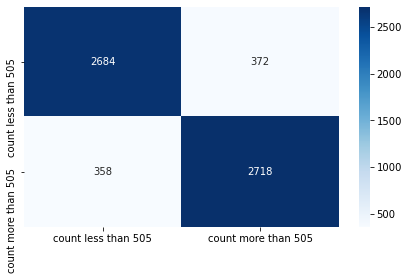

Test Confusion matrix


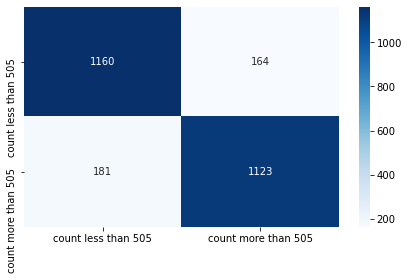

In [50]:
print(f'Train score {accuracy_score(y_train_pred_poly,y_train)}')
print(f'Test score {accuracy_score(y_pred_poly,y_test)}')
plot_confusionmatrix(y_train_pred_poly,y_train,dom='Train')
plot_confusionmatrix(y_pred_poly,y_test,dom='Test')

DECISION TREES

In [51]:
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [52]:
dy_train_pred = dclassifier.predict(X_train)
dy_test_pred = dclassifier.predict(X_test)

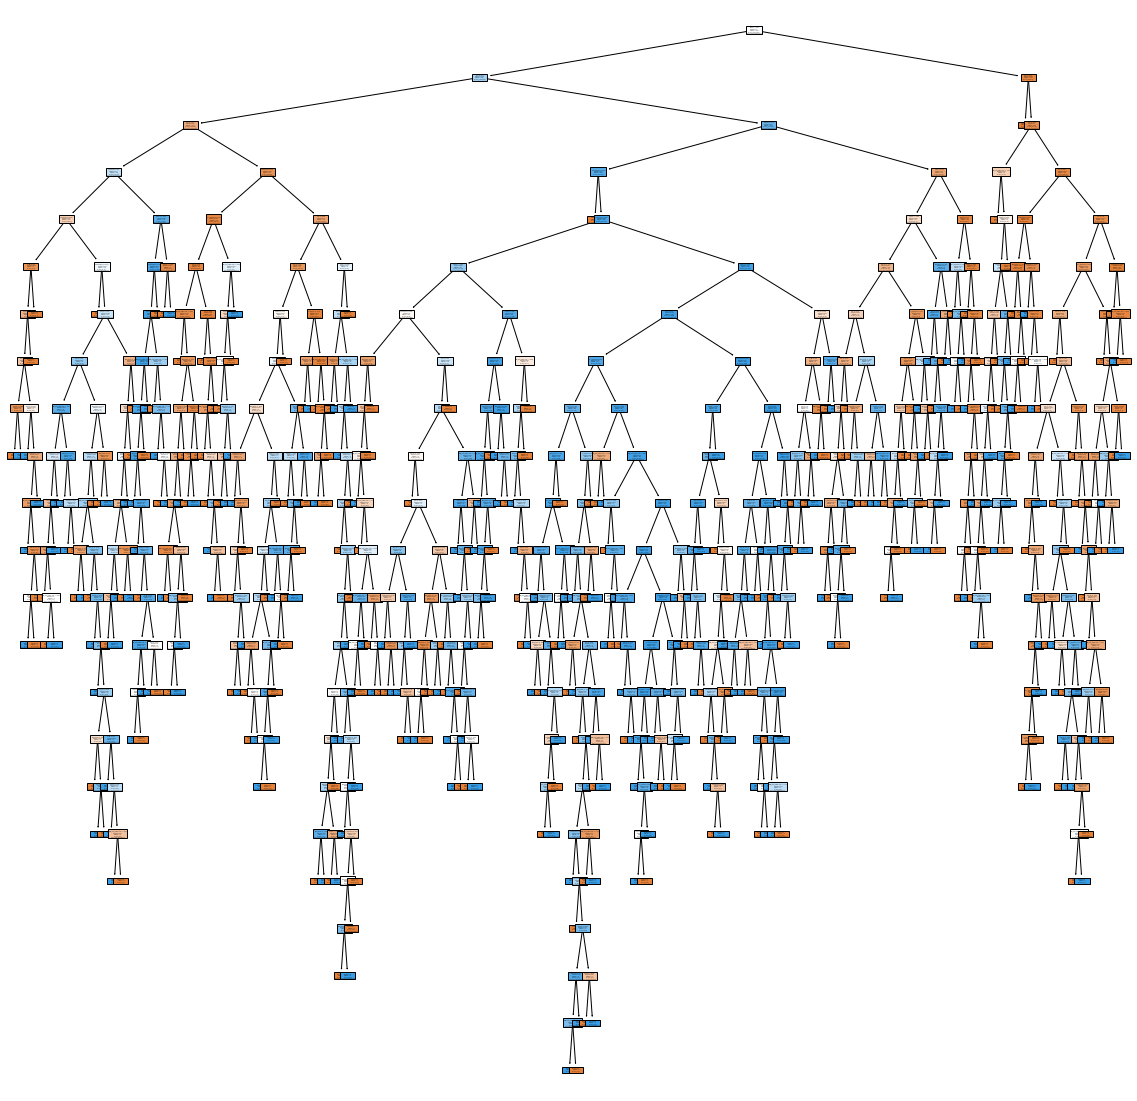

In [53]:
from sklearn import tree 
plt.figure(figsize=(20,20))
features = data.columns
classes = ['count less than 505','count more than 505']
tree.plot_tree(dclassifier,feature_names=features,class_names=classes,filled=True)
plt.show()

In [54]:
# helper function
def plot_confusionmatrix(dy_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(dy_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.9098173515981736
Train Confusion matrix


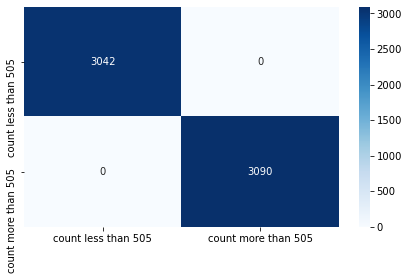

Test Confusion matrix


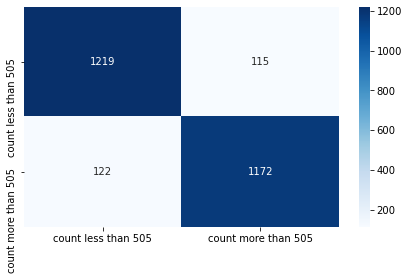

In [55]:
print(f'Train score {accuracy_score(dy_train_pred,y_train)}')
print(f'Test score {accuracy_score(dy_test_pred,y_test)}')
plot_confusionmatrix(dy_train_pred,y_train,dom='Train')
plot_confusionmatrix(dy_test_pred,y_test,dom='Test')

In [56]:
dcm_report = classification_report(y_test, dy_test_pred)
print(dcm_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1341
           1       0.91      0.91      0.91      1287

    accuracy                           0.91      2628
   macro avg       0.91      0.91      0.91      2628
weighted avg       0.91      0.91      0.91      2628



Post pruning 

In [57]:
path = dclassifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)

In [58]:
model = []
for ccp_alpha in ccp_alphas:
    clf_post = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_post.fit(X_train, y_train)
    model.append(clf_post)

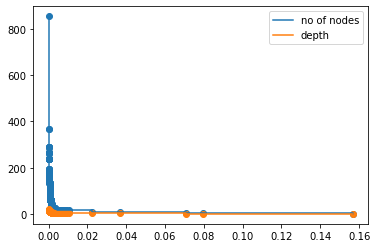

In [59]:
model = model[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf_post.tree_.node_count for clf_post in model]
depth = [clf_post.tree_.max_depth for clf_post in model]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

#Observation: As alpha increases no of nodes and depth decreases

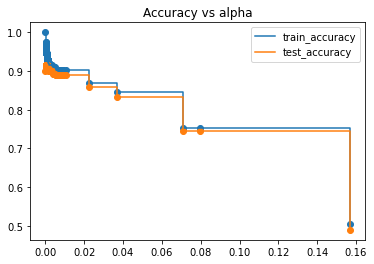

In [60]:
train_acc = []
test_acc = []
for c in model:
    y_train_pred_postcv = c.predict(X_train)
    y_test_pred_postcv = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred_postcv,y_train))
    test_acc.append(accuracy_score(y_test_pred_postcv,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [61]:
clf_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

In [62]:
# helper function
def plot_confusionmatrix(dy_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(dy_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.8878016960208741
Test score 0.8831811263318112
Train Confusion matrix


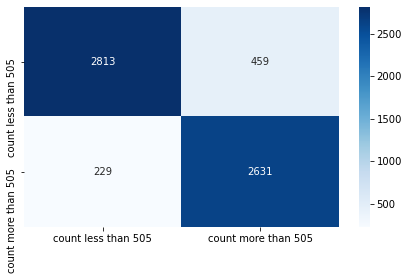

Test Confusion matrix


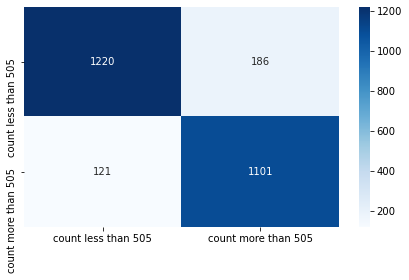

In [63]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [64]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1341
           1       0.90      0.86      0.88      1287

    accuracy                           0.88      2628
   macro avg       0.88      0.88      0.88      2628
weighted avg       0.88      0.88      0.88      2628



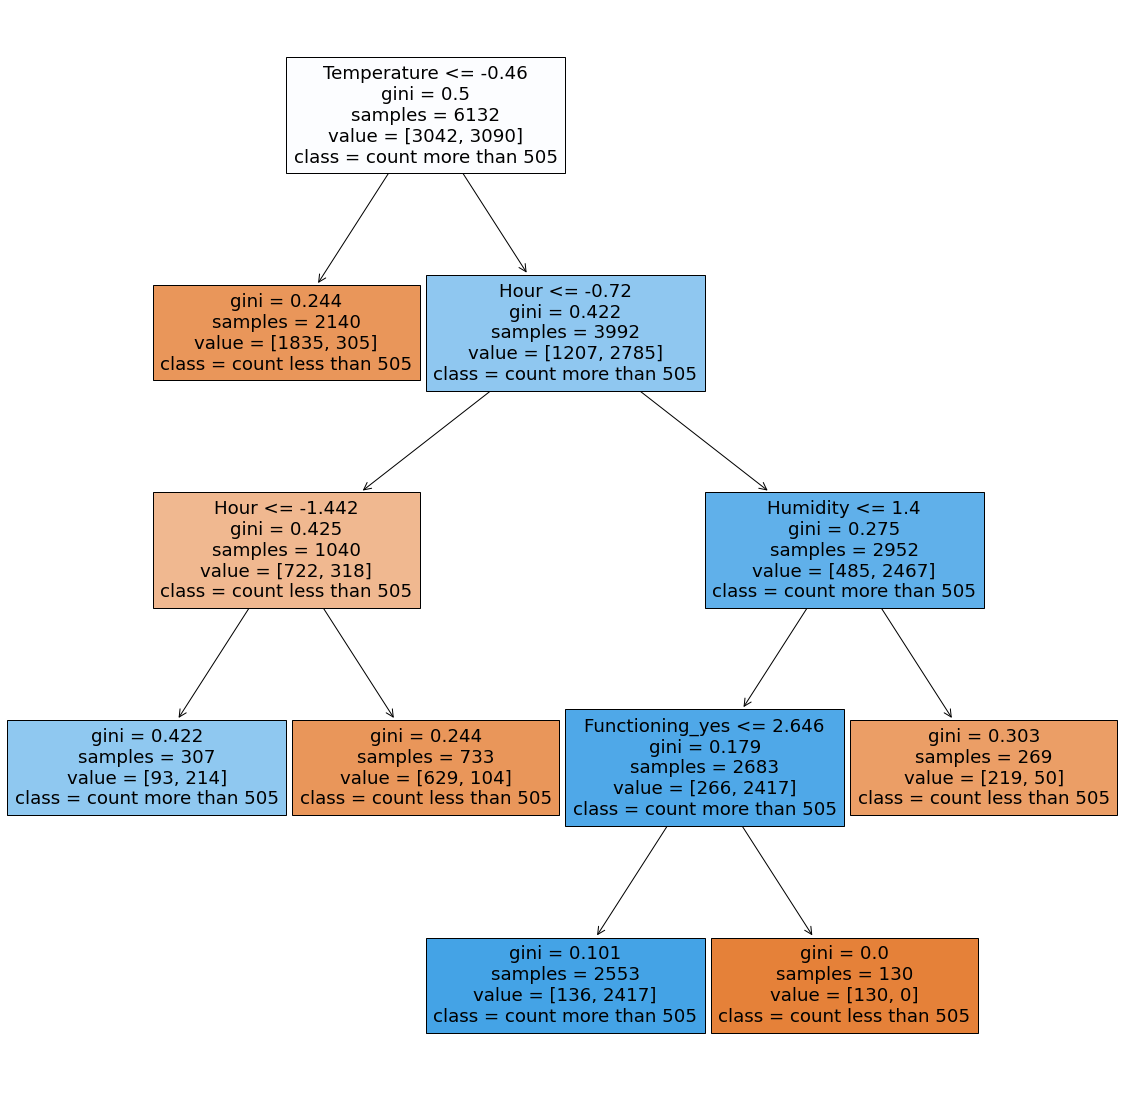

In [65]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['count less than 505','count more than 505']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

Pre pruning

In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

dclassifier_pre_cv = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=dclassifier_pre_cv,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [67]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred_pre_cv = model.predict(X_train)
y_test_pred_pre_cv = model.predict(X_test)

Train score 0.9616764514024788
Test score 0.9155251141552512
Train Confusion matrix


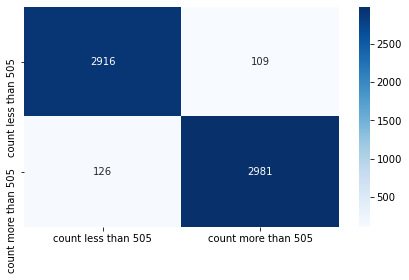

Test Confusion matrix


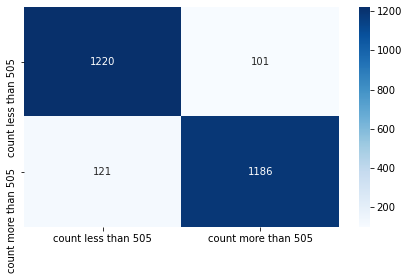

In [68]:
print(f'Train score {accuracy_score(y_train_pred_pre_cv,y_train)}')
print(f'Test score {accuracy_score(y_test_pred_pre_cv,y_test)}')
plot_confusionmatrix(y_train_pred_pre_cv,y_train,dom='Train')
plot_confusionmatrix(y_test_pred_pre_cv,y_test,dom='Test')

In [69]:
print(classification_report(y_test, y_test_pred_pre_cv))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1341
           1       0.91      0.92      0.91      1287

    accuracy                           0.92      2628
   macro avg       0.92      0.92      0.92      2628
weighted avg       0.92      0.92      0.92      2628



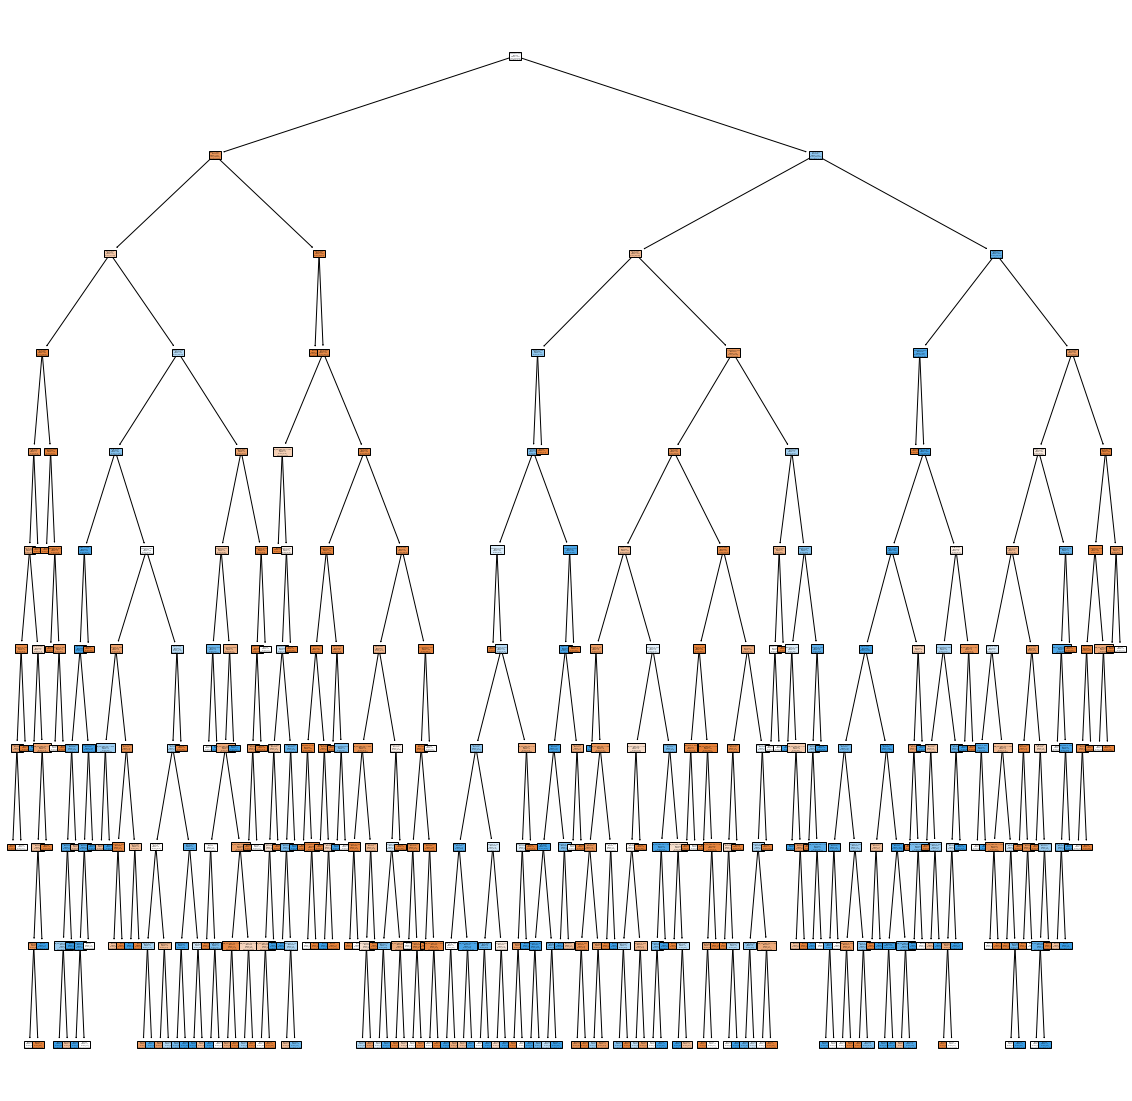

In [70]:
plt.figure(figsize=(20,20))
features = data.columns
classes = ['less than 505','more than 505']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

CROSS VALIDATION

In [71]:
from sklearn.model_selection import cross_val_score, KFold, learning_curve

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X)


cv for SVM (Linear kernel)

In [73]:
print("\n\nSVM,  Linear kernel:")
classifier = SVC(kernel='linear', random_state=0)
print(cross_val_score(classifier, X_new , y, scoring='accuracy', cv=cv))
accuracy = cross_val_score(classifier, X_new , y, scoring='accuracy', cv=cv).mean() * 100
print("Accuracy of SVM (Linear kernel) is: ", accuracy)



SVM,  Linear kernel:
[0.8630137  0.85388128 0.86073059 0.87442922 0.86643836 0.85616438
 0.84931507 0.8869863  0.86872146 0.87899543]
Accuracy of SVM (Linear kernel) is:  86.58675799086758


In [74]:
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(classifier,X_new, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)


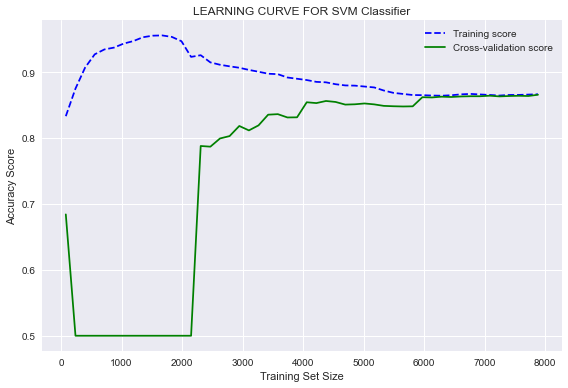

In [93]:
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
# Drawing plot
plt.title("LEARNING CURVE FOR SVM Classifier")
plt.xlabel("Training Set Size"), 
plt.ylabel("Accuracy Score"), 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

cv for SVM (RBF kernel)

In [108]:
print("\n\nSVM,rbf kernel:")
classifier_rbf = SVC(kernel='rbf', C=1, random_state=0)
print(cross_val_score(classifier_rbf, X_new, y, scoring='accuracy', cv=cv))
accuracy = cross_val_score(classifier_rbf, X_new, y, scoring='accuracy', cv=cv).mean() * 100
print("Accuracy of SVM (rbf kernel)is: ", accuracy)



SVM,rbf kernel:
[0.87442922 0.88127854 0.87328767 0.89155251 0.88013699 0.87557078
 0.87785388 0.89840183 0.89383562 0.89269406]
Accuracy of SVM (rbf kernel)is:  88.3904109589041


In [77]:
from sklearn.model_selection import learning_curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes_2, training_scores_2, testing_scores_2 = learning_curve(classifier_rbf,X_new,y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training_2 = np.mean(training_scores_2, axis=1)
Standard_Deviation_training_2 = np.std(training_scores_2, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing_2 = np.mean(testing_scores_2, axis=1)
Standard_Deviation_testing_2 = np.std(testing_scores_2, axis=1)


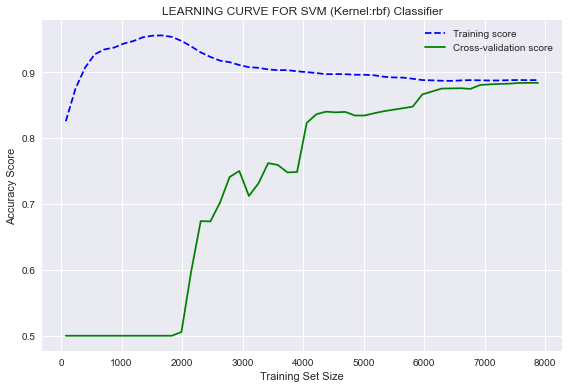

In [92]:
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes_2, mean_training_2, '--', color="b", label="Training score")
plt.plot(sizes_2, mean_testing_2, color="g", label="Cross-validation score")
# Drawing plot
plt.title("LEARNING CURVE FOR SVM (Kernel:rbf) Classifier")
plt.xlabel("Training Set Size"), 
plt.ylabel("Accuracy Score"), 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

cv for SVM (Poly kernel)

In [79]:
print("\n\nSVM,poly kernel:")
classifier_poly = SVC(kernel='poly',C=1, random_state=0)
print(cross_val_score(classifier_poly, X_new, y, scoring='accuracy', cv=cv))
accuracy = cross_val_score(classifier_poly, X_new, y, scoring='accuracy', cv=cv).mean() * 100
print("Accuracy of SVM (poly kernel) is: ", accuracy)



SVM,poly kernel:
[0.87100457 0.86757991 0.86872146 0.89611872 0.88013699 0.86986301
 0.87100457 0.89155251 0.87671233 0.88584475]
Accuracy of SVM (poly kernel) is:  87.78538812785388


In [80]:
from sklearn.model_selection import learning_curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes_3, training_scores_3, testing_scores_3 = learning_curve(classifier_poly,X_new, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training_3 = np.mean(training_scores_3, axis=1)
Standard_Deviation_training_3 = np.std(training_scores_3, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing_3 = np.mean(testing_scores_3, axis=1)
Standard_Deviation_testing_3 = np.std(testing_scores_3, axis=1)


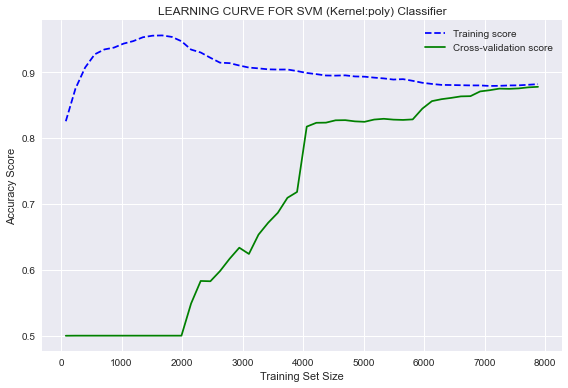

In [91]:
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes_3, mean_training_3, '--', color="b", label="Training score")
plt.plot(sizes_3, mean_testing_3, color="g", label="Cross-validation score")
# Drawing plot
plt.title("LEARNING CURVE FOR SVM (Kernel:poly) Classifier")
plt.xlabel("Training Set Size"), 
plt.ylabel("Accuracy Score"), 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

tuning hyper parameters for rbf kernel (gamma and C)

In [149]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score_train=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score_train.append(scores.mean())
print(acc_score)   

[0.833711142716164, 0.8481685194322701, 0.8607247554639654, 0.875186485937364]


In [150]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score_test=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')
    acc_score_test.append(scores.mean())
print(acc_score)   

[0.833711142716164, 0.8481685194322701, 0.8607247554639654, 0.875186485937364]


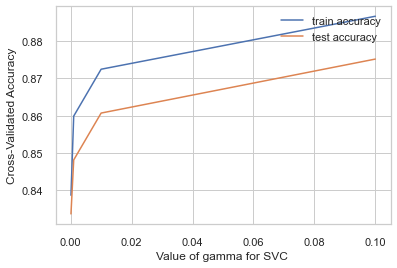

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score_train)
plt.plot(gamma_range,acc_score_test)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(['train accuracy','test accuracy'], loc='upper right')

In [156]:
C_range=list(range(1,10))
acc_score_ct=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score_ct.append(scores.mean())
print(acc_score_ct)   

[0.8806220807583784, 0.8860046442178426, 0.8925291326365237, 0.8949750519419102, 0.8961167112136075, 0.896443241175189, 0.8969321062112428, 0.8967689740742119, 0.8975841033843277]


In [157]:
C_range=list(range(1,10))
acc_score_t=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')
    acc_score_t.append(scores.mean())
print(acc_score_t) 

[0.8717542739384088, 0.8755623603169536, 0.8759425884538355, 0.8763271703480104, 0.8770890778742053, 0.8801381592314168, 0.8820392999158274, 0.8816590717789452, 0.8824209793051404]


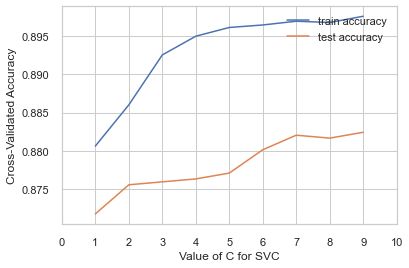

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,10))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score_ct)
plt.plot(C_values,acc_score_t)
plt.xticks(np.arange(0,11,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(['train accuracy','test accuracy'], loc='upper right')

GRID SERACH CV FOR SVM

In [82]:
from sklearn.svm import SVC
svm_model= SVC()

In [83]:
tuned_parameters = {'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf']}

In [94]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [95]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.8794806871742006


In [96]:
print(model_svm.best_params_)

{'C': 0.9, 'gamma': 0.04, 'kernel': 'rbf'}


In [97]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.8748097412480974


cv for decision tree

In [85]:
print("\n\nDecision Tree without post or pre pruning:")
print(cross_val_score(dclassifier, X, y, scoring='accuracy', cv=cv))
accuracy = cross_val_score(
    dclassifier, X_train, y_train, scoring='accuracy', cv=cv).mean() * 100
print("Accuracy of DT (without post or pre pruning) is: ", accuracy)




Decision Tree without post or pre pruning:
[0.91438356 0.93150685 0.9086758  0.91666667 0.90753425 0.90639269
 0.90182648 0.91210046 0.91210046 0.92808219]
Accuracy of DT (without post or pre pruning) is:  91.0795415296162


In [86]:
from sklearn.model_selection import learning_curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes_d, training_scores_d, testing_scores_d = learning_curve(dclassifier,X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training_d = np.mean(training_scores_d, axis=1)
Standard_Deviation_training_d = np.std(training_scores_d, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing_d = np.mean(testing_scores_d, axis=1)
Standard_Deviation_testing_d = np.std(testing_scores_d, axis=1)


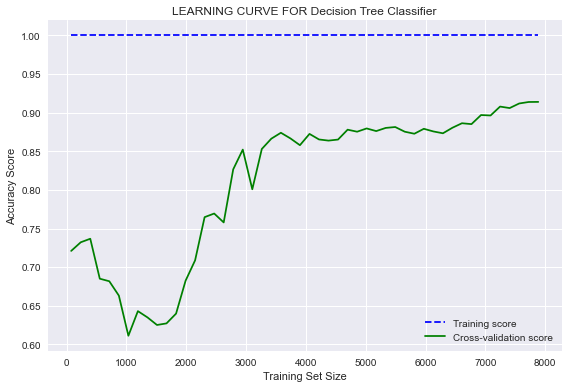

In [90]:
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes_d, mean_training_d, '--', color="b", label="Training score")
plt.plot(sizes_d, mean_testing_d, color="g", label="Cross-validation score")
# Drawing plot
plt.title("LEARNING CURVE FOR Decision Tree Classifier")
plt.xlabel("Training Set Size"), 
plt.ylabel("Accuracy Score"), 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

---

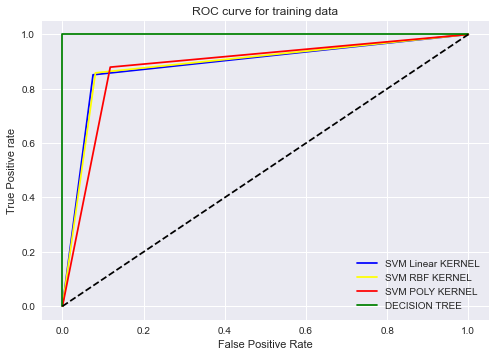

In [88]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, y_train_pred)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_train, y_train_pred_rbf)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_train, y_train_pred_poly)
fpr_4, tpr_4, thresholds_4 = roc_curve(y_train, dy_train_pred)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_train))]
pfpr, ptpr, _ = roc_curve(y_train, random_probs, pos_label=1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr_1, tpr_1,color='blue', label='SVM Linear KERNEL')
plt.plot(fpr_2, tpr_2,color='yellow', label='SVM RBF KERNEL')
plt.plot(fpr_3, tpr_3,color='red', label='SVM POLY KERNEL')
plt.plot(fpr_4, tpr_4,color='green', label='DECISION TREE')
plt.plot(pfpr, ptpr, linestyle='--', color='black')

plt.title('ROC curve for training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

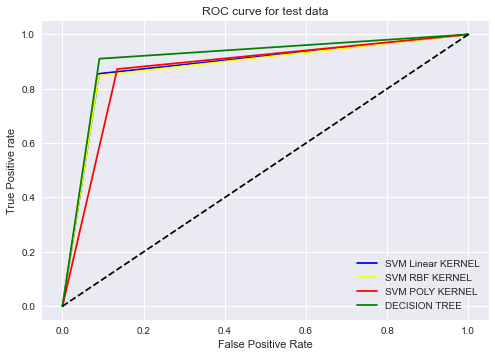

In [89]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_test_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_rbf)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_poly)
fpr4, tpr4, thresholds4 = roc_curve(y_test, dy_test_pred)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1,color='blue', label='SVM Linear KERNEL')
plt.plot(fpr2, tpr2,color='yellow', label='SVM RBF KERNEL')
plt.plot(fpr3, tpr3,color='red', label='SVM POLY KERNEL')
plt.plot(fpr4, tpr4,color='green', label='DECISION TREE')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

plt.title('ROC curve for test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

THE END 